## Download and prepare the dataset

Set up the posits as default

In [99]:
import tensorflow.python.keras as k
k.backend.set_floatx("posit160")
k.backend.floatx()

'posit160'

In [100]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="posit160")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:2000].reshape((2000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:2000])
test_labels = to_categorical(test_labels)

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [101]:
train_images.shape

(2000, 28, 28, 1)

## Download and prepare the dataset

In [102]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh", kernel_initializer=random_normal_init))
# model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh"))
# model.add(layers.Dense(10, activation='softmax'))

model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))


Let's display the architecture of our convnet so far:

In [103]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 1)         10        
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 1)         0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 1)           0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 1)           10        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 1)          

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [104]:
optimizer = k.optimizers.adam_v2.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [105]:
weights_before = model.get_weights()

In [106]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

history = model.fit(train_images, train_labels, epochs=50, batch_size=125, validation_split=0.1, callbacks=[earlystop_callback])

Epoch 1/50


15/15 [==============================] - 1s 27ms/step - loss: 2.2822 - accuracy: 0.1076 - val_loss: 4.9941 - val_accuracy: 0.1050
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 2.2822 - accuracy: 0.1131 - val_loss: 4.9941 - val_accuracy: 0.1050
Epoch 3/50
15/15 [==============================] - 0s 21ms/step - loss: 2.2822 - accuracy: 0.1131 - val_loss: 4.9941 - val_accuracy: 0.1050
Epoch 4/50
15/15 [==============================] - 0s 21ms/step - loss: 2.2822 - accuracy: 0.1131 - val_loss: 4.9941 - val_accuracy: 0.1050
Epoch 5/50
15/15 [==============================] - 0s 22ms/step - loss: 2.2822 - accuracy: 0.1131 - val_loss: 4.9941 - val_accuracy: 0.1050
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 2.2822 - accuracy: 0.1131 - val_loss: 4.9941 - val_accuracy: 0.1050


In [107]:
weights_after = model.get_weights()

In [108]:
import numpy as np

print(np.array_equal(weights_before[0],weights_after[0]))


print(weights_before[0])
print("==============================")
print(weights_after[0])

True
[[[[0.614258]]

  [[1.66406]]

  [[1.53076]]]


 [[[-0.784668]]

  [[0.142151]]

  [[1.05859]]]


 [[[1.01807]]

  [[1.09521]]

  [[1.8877]]]]
[[[[0.614258]]

  [[1.66406]]

  [[1.53076]]]


 [[[-0.784668]]

  [[0.142151]]

  [[1.05859]]]


 [[[1.01807]]

  [[1.09521]]

  [[1.8877]]]]


**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

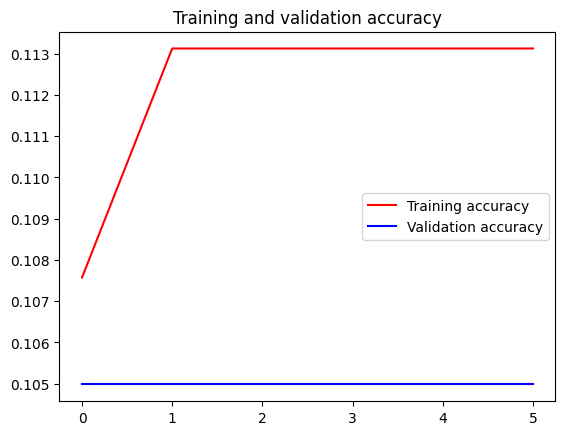

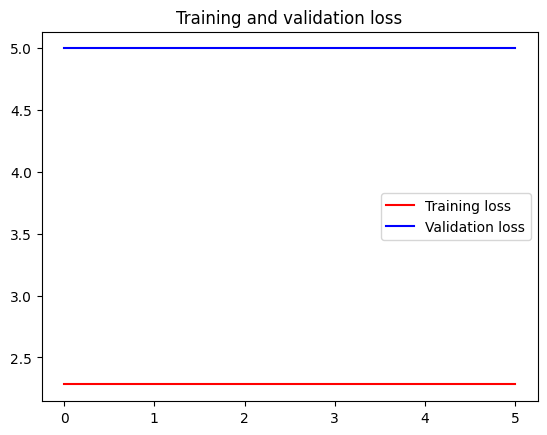

In [109]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [110]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

  1/313 [..............................] - ETA: 4s - loss: 4.8438 - accuracy: 0.0938

313/313 [==============================] - 1s 5ms/step - loss: 4.1777 - accuracy: 0.1028


In [111]:
test_acc

0.102753

In [112]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0.195312, 0.00199127, 0.000546455, 0.00115013, 0.00724411,
        0.000569344, 0.0299225, 0.739502, 0.0186157, 0.00547791]],
      dtype=posit160)

In [113]:
print(random_normal_init((10,)))


tf.Tensor(
[-0.251343 1.73291 -0.348267 -0.491699 -1.03027 0.650146 -1.11084 -1.27588
 -0.841064 -2.08203], shape=(10,), dtype=posit160)


In [114]:
initializer = k.initializers.GlorotUniform()
values = initializer(shape=(10,), dtype="posit160")
print(values)

tf.Tensor(
[-0.546143 -0.544922 -0.545654 -0.539062 -0.545166 -0.541016 -0.544434
 -0.542236 -0.54248 -0.544678], shape=(10,), dtype=posit160)
